<a href="https://colab.research.google.com/github/mharrisonbaker/DATA620/blob/main/citations_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [11]:
df1 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-2.json', lines=True, dtype=False)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    827533 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  875583 non-null   object
 4   title       1000000 non-null  object
 5   venue       1000000 non-null  object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [4]:
df2 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-1.json', lines=True, dtype=False)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    922383 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  929533 non-null   object
 4   title       1000000 non-null  object
 5   venue       1000000 non-null  object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
df3 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-0.json', lines=True, dtype=False)

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    753646 non-null   object
 1   authors     1000000 non-null  object
 2   n_citation  1000000 non-null  int64 
 3   references  861480 non-null   object
 4   title       1000000 non-null  object
 5   venue       1000000 non-null  object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
df4 = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-3.json', lines=True, dtype=False)

In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79007 entries, 0 to 79006
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   abstract    44970 non-null  object
 1   authors     79007 non-null  object
 2   n_citation  79007 non-null  int64 
 3   references  49546 non-null  object
 4   title       79007 non-null  object
 5   venue       79007 non-null  object
 6   year        79007 non-null  int64 
 7   id          79007 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.8+ MB


In [12]:
# dfa = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-0.json', lines=True, dtype=False)
# dfb = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-1.json', lines=True, dtype=False)
# dfc = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-2.json', lines=True, dtype=False)
# dfd = pd.read_json('/content/drive/MyDrive/academic_citation_v10/dblp-ref-3.json', lines=True, dtype=False)
df = pd.concat([df1, df2, df3, df4])

pd.DataFrame.to_csv(df, 'all_cites.txt', sep=',', na_rep='', index=False)

In [13]:
dfG=df[['id', 'references']].copy()
dfG.set_index(['id'])
dfG['references'].tolist()
dfG=dfG.explode('references')
dfG.head()

,id,references
0,4ab3735c-80f1-472d-b953-fa0557fed28b,09cb2d7d-47d1-4a85-bfe5-faa8221e644b
0,4ab3735c-80f1-472d-b953-fa0557fed28b,10aa16da-3cc8-4af6-9d66-48037e915d76
0,4ab3735c-80f1-472d-b953-fa0557fed28b,35cb45c3-9408-4096-ab30-bc2e4de3fb5d
0,4ab3735c-80f1-472d-b953-fa0557fed28b,661a342e-a911-4420-b67d-51c75d3b14e9
0,4ab3735c-80f1-472d-b953-fa0557fed28b,779553f3-e4c1-456e-bc01-5eb9d9567541


In [15]:
import networkx as nx

In [16]:
G = nx.from_pandas_edgelist(dfG, source='id', target='references', create_using=nx.Graph)

In [17]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 3079008\nNumber of edges: 25690450\nAverage degree:  16.6875'

In [18]:
#find the biggest subgraph
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.info(G0)

'Name: \nType: Graph\nNumber of nodes: 3078775\nNumber of edges: 25690306\nAverage degree:  16.6887'

In [20]:
import numpy as np

In [22]:
#generate random number
random_id = np.random.choice(5000,size = 1)

#pick random row of df
dfR = df.iloc[random_id]

#grab the ID of the row (a random id)
rID=dfR['id'].item()
rID

#list the nodes connected to the random node
Nlist=list(nx.all_neighbors(G,rID))
Nlist.append(rID)

#make a small dataframe from the neighbors
df_rand=df[df['id'].isin(Nlist)]
df_rand

,abstract,authors,n_citation,references,title,venue,year,id
847,Multiband orthogonal frequency division multip...,"[Wen Fan, Chiu-Sing Choy, Ka Nang Leung]",10,"[32adeb60-745a-4660-bbc3-a475cf5e1703, e3faac3...",Robust and low complexity packet detector desi...,international symposium on circuits and systems,2009,4af7eebf-8b58-43d2-a4ff-75d812759077
461484,Multiband orthogonal frequency-division multip...,"[Jyh-Ting Lai, An-Yeu Wu, Wen-Chiang Chen]",50,[96e1c51b-e67e-4691-bdde-55a0d6da8dad],A Systematic Design Approach to the Band-Track...,IEEE Transactions on Vehicular Technology,2007,e3faac39-bb3c-49ea-8715-5355cb635339
463846,A robust symbol-timing and carrier-frequency s...,"[Hlaing Minn, Vijay K. Bhargava, Khaled Ben Le...",686,"[1e78946c-77e5-417a-a56e-0959b82484ac, 20fbecb...",A robust timing and frequency synchronization ...,IEEE Transactions on Wireless Communications,2003,e4cd3ab9-3ff1-47be-9ab7-911205551aeb
58668,This paper presents optimized synchronization ...,"[Wen Fan, Chiu-Sing Choy]",50,"[053288ba-786d-4523-917c-7c854957f5a9, 2f5d425...","Robust, Low-Complexity, and Energy Efficient D...",IEEE Transactions on Circuits and Systems I-re...,2012,58628f34-02aa-46a5-b4ce-efcdf9ba7677
163376,The multi-band orthogonal frequency-division m...,"[Seok Joong Hwang, Youngsun Han, Seon Wook Kim...",50,"[0cd5ce3e-dfe1-4e07-a01b-742e3082377a, 20fbecb...",Resource Efficient Implementation of Low Power...,IEEE Transactions on Very Large Scale Integrat...,2012,70d10da7-d89c-48d5-81d9-f9bd8012f621
927086,A rapid synchronization method is presented fo...,"[Timothy M. Schmidl, Donald C. Cox]",4222,"[20fbecb4-319f-4c70-b4f2-7f9adac2d9d4, 7a00e78...",Robust frequency and timing synchronization fo...,IEEE Transactions on Communications,1997,32adeb60-745a-4660-bbc3-a475cf5e1703


In [31]:
dfG_rand=df_rand[['id', 'references']].copy()
dfG_rand.set_index(['id'])
dfG_rand['references'].tolist()
dfG_rand=dfG_rand.explode('references')
dfG_rand.head()

,id,references
847,4af7eebf-8b58-43d2-a4ff-75d812759077,32adeb60-745a-4660-bbc3-a475cf5e1703
847,4af7eebf-8b58-43d2-a4ff-75d812759077,e3faac39-bb3c-49ea-8715-5355cb635339
847,4af7eebf-8b58-43d2-a4ff-75d812759077,e4cd3ab9-3ff1-47be-9ab7-911205551aeb
461484,e3faac39-bb3c-49ea-8715-5355cb635339,96e1c51b-e67e-4691-bdde-55a0d6da8dad
463846,e4cd3ab9-3ff1-47be-9ab7-911205551aeb,1e78946c-77e5-417a-a56e-0959b82484ac


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
#for calculating cosine similarity
k = df_rand['abstract'].tolist()
#vectorize the abstract list
vec = TfidfVectorizer()
X = vec.fit_transform(k) 
#calc the cosine similarities 
S = cosine_similarity(X)
#legnth of S
print(len(S))
#back to a list
T  = S.tolist()
print(T)
#add to df
# df = pd.DataFrame.from_records(T)

6
[[1.0, 0.315153450430202, 0.2673476189877697, 0.4206581209075354, 0.2628448426869847, 0.18723966359920757], [0.315153450430202, 1.0000000000000007, 0.2733155677564446, 0.3207016263302329, 0.3078618042211462, 0.317494569765338], [0.2673476189877697, 0.2733155677564446, 1.0, 0.3214774888341333, 0.26996062432977, 0.3655855284880487], [0.4206581209075354, 0.3207016263302329, 0.3214774888341333, 0.9999999999999997, 0.3442272852469309, 0.28156305642610596], [0.2628448426869847, 0.3078618042211462, 0.26996062432977, 0.3442272852469309, 1.0, 0.25736945701015584], [0.18723966359920757, 0.317494569765338, 0.3655855284880487, 0.28156305642610596, 0.25736945701015584, 1.0]]


In [33]:
#create graph from exploded df
G_rand = nx.from_pandas_edgelist(dfG_rand, source='id', target='references', create_using=nx.Graph)

In [27]:
import matplotlib.pyplot as plt

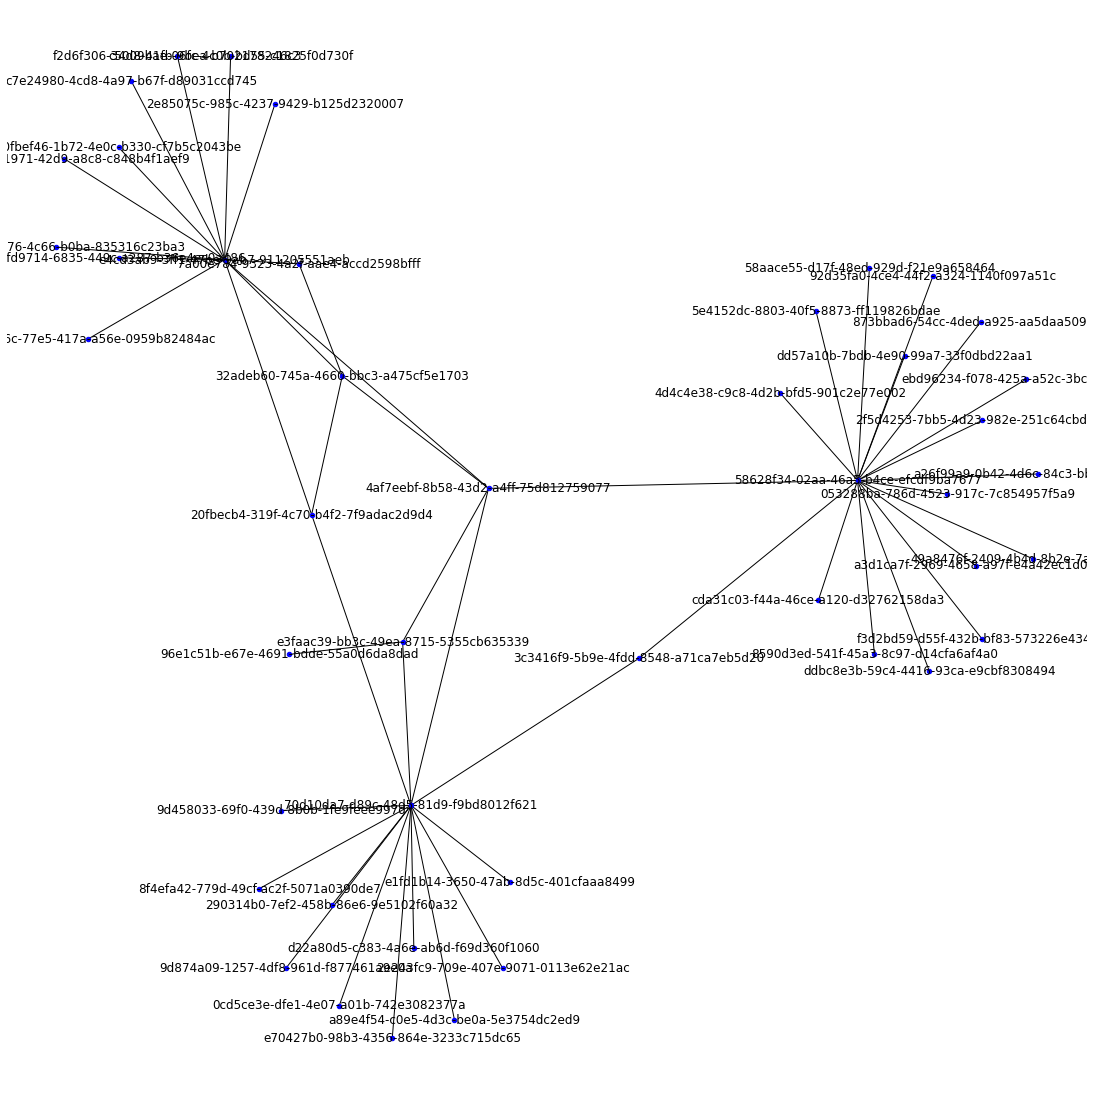

In [34]:
plt.figure(figsize = [15,15]) 
pos = nx.spring_layout(G_rand) 
nx.draw(G_rand, node_size = 20 , node_color = 'blue', with_labels=True)
# nx.draw_networkx_labels(H, pos, labels, font_size=16, font_color='red')
plt.savefig('cite.png')